# Metrics visualization

In [2]:
import os
import json

import pandas as pd
import matplotlib.pyplot as plt

## DPO reward accuracy

In [15]:
data = []
directory = 'dpo_reward_acc'

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            json_data = json.load(file)
            model_name = filename.replace('mcqa_acc_', '').replace('.json', '')
            accuracy = json_data.get('policy_reward_accuracy', None)
            data.append({'model': model_name, 'accuracy': accuracy})

In [16]:
df = pd.DataFrame(data)
df.sort_values(by='accuracy', ascending=False, inplace=True)
df.head(6)

,model,accuracy
2,reward_acc_dpo_3,0.561404
3,reward_acc_dpo_4,0.559733
5,reward_acc_dpo_2,0.521303
1,reward_acc_dpo_1,0.462824
4,reward_acc_base,0.242272
0,reward_acc_gpt2,0.240184


## MCQA accuracy

In [6]:
data = []

for directory in ['MCQA_FT_acc', 'extraction_long_gen_acc']:
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                json_data = json.load(file)
                model_name = filename.replace('mcqa_acc_', '').replace('.json', '')
                accuracy = json_data.get('policy_acc', None)
                data.append({'model': model_name, 'accuracy': accuracy})

In [11]:
df = pd.DataFrame(data)
df.sort_values(by='accuracy', ascending=False, inplace=True)
df.head(6)

,model,accuracy
2,sft_base,0.393417
1,sft_dpo_3,0.330721
0,sft_gpt2,0.261755
5,extract_dpo_3,0.241379
4,extract_base2,0.235110
3,extract_base,0.227273


## MCQA accuracy by category

In [7]:
directory = 'MCQA_FT_by_cat_acc'
data = []

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            json_data = json.load(file)
            category = filename.replace('acc_', '').replace('.json', '')
            accuracy = json_data.get('policy_acc', None)
            data.append({'category': category, 'accuracy': accuracy})

In [12]:
df = pd.DataFrame(data)
df.sort_values(by='accuracy', ascending=True, inplace=True)

df.head()

,category,accuracy
4,high_school_computer_science,0.125000
2,college_computer_science,0.166667
16,high_school_physics,0.187500
14,college_mathematics,0.200000
13,high_school_mathematics,0.214286


In [39]:
avg_acc = 0.3934169278996865

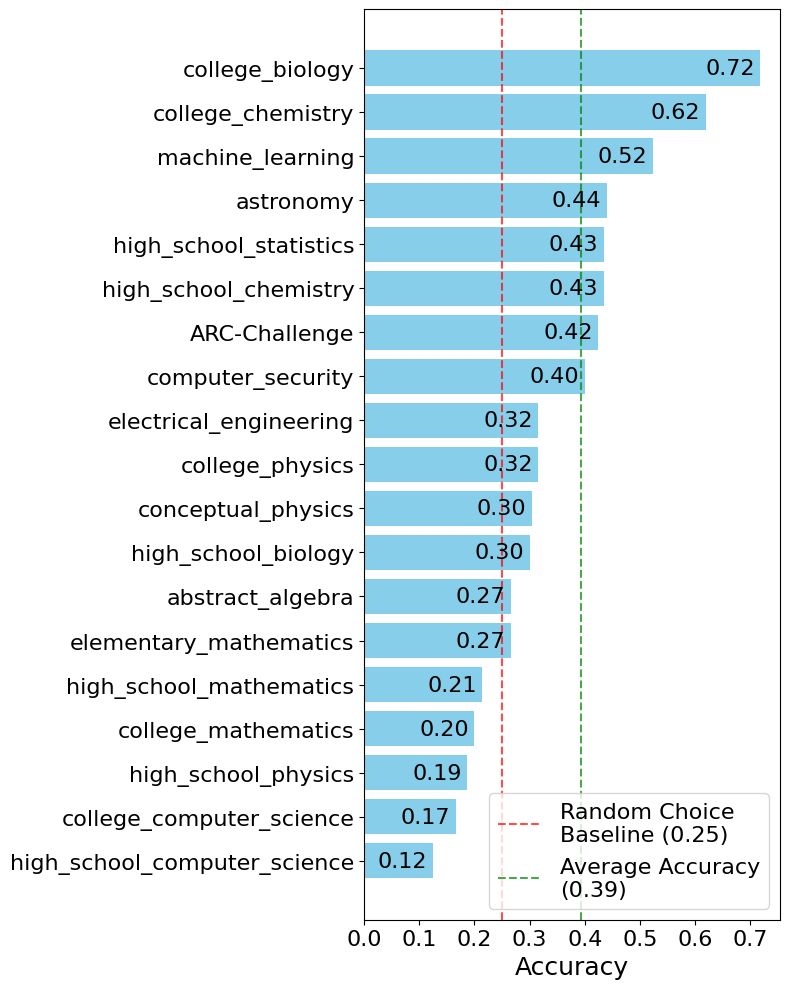

In [68]:
plt.figure(figsize=(8, 10))
bars = plt.barh(df['category'], df['accuracy'], color='skyblue')

# plt.ylabel('Category')
plt.xlabel('Accuracy', fontsize=18)
# plt.title('Accuracy by Category', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.axvline(x=0.25, color='red', linestyle='--', label='Random Choice\nBaseline (0.25)', alpha=0.7)
plt.axvline(x=avg_acc, color='green', linestyle='--', label=f'Average Accuracy\n({avg_acc:.2f})', alpha=0.7)

plt.legend(fontsize=16, loc='lower right')

for bar in bars:
    plt.text(bar.get_width() - 0.1,  # Position to the right of the bar
             bar.get_y() + bar.get_height()/2,  # Vertical position in the middle of the bar
             f'{bar.get_width():.2f}',  # Accuracy value with 2 decimal places
             va='center',  # Vertical alignment
             fontsize=16) 

plt.tight_layout()
plt.show()